In [1]:
!wget "https://media.githubusercontent.com/media/pradeep-016/ML_Course/refs/heads/main/1)%20Regression%20Models/Support%20Vector%20Regressor/df_batting.csv"
!wget "https://media.githubusercontent.com/media/pradeep-016/ML_Course/refs/heads/main/1)%20Regression%20Models/Support%20Vector%20Regressor/df_bowling.csv"

--2024-11-25 14:40:32--  https://media.githubusercontent.com/media/pradeep-016/ML_Course/refs/heads/main/1)%20Regression%20Models/Support%20Vector%20Regressor/df_batting.csv
Resolving media.githubusercontent.com (media.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to media.githubusercontent.com (media.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 57977 (57K) [text/plain]
Saving to: ‘df_batting.csv’

df_batting.csv      100%[===================>]  56.62K  --.-KB/s    in 0.01s   

2024-11-25 14:40:32 (4.23 MB/s) - ‘df_batting.csv’ saved [57977/57977]

--2024-11-25 14:40:32--  https://media.githubusercontent.com/media/pradeep-016/ML_Course/refs/heads/main/1)%20Regression%20Models/Support%20Vector%20Regressor/df_bowling.csv
Resolving media.githubusercontent.com (media.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to media.githubuserc

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, LabelEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, r2_score

In [3]:
batting = pd.read_csv("df_batting.csv")
bowling = pd.read_csv("df_bowling.csv")

In [4]:
batting.head()

,match,teamInnings,battingPos,batsmanName,runs,balls,4s,6s,SR,out/not_out,match_id
0,Namibia Vs Sri Lanka,Namibia,1,Michael van Lingen,3,6,0,0,50.00,out,T20I # 1823
1,Namibia Vs Sri Lanka,Namibia,2,Divan la Cock,9,9,1,0,100.00,out,T20I # 1823
2,Namibia Vs Sri Lanka,Namibia,3,Jan Nicol Loftie-Eaton,20,12,1,2,166.66,out,T20I # 1823
3,Namibia Vs Sri Lanka,Namibia,4,Stephan Baard,26,24,2,0,108.33,out,T20I # 1823
4,Namibia Vs Sri Lanka,Namibia,5,Gerhard Erasmus(c),20,24,0,0,83.33,out,T20I # 1823


In [5]:
bowling.head()

,match,bowlingTeam,bowlerName,overs,maiden,runs,wickets,economy,0s,4s,6s,wides,noBalls,match_id
0,Namibia Vs Sri Lanka,Sri Lanka,Maheesh Theekshana,4.0,0,23,1,5.75,7,0,0,2,0,T20I # 1823
1,Namibia Vs Sri Lanka,Sri Lanka,Dushmantha Chameera,4.0,0,39,1,9.75,6,3,1,2,0,T20I # 1823
2,Namibia Vs Sri Lanka,Sri Lanka,Pramod Madushan,4.0,0,37,2,9.25,6,3,1,0,0,T20I # 1823
3,Namibia Vs Sri Lanka,Sri Lanka,Chamika Karunaratne,4.0,0,36,1,9.00,7,3,1,1,0,T20I # 1823
4,Namibia Vs Sri Lanka,Sri Lanka,Wanindu Hasaranga de Silva,4.0,0,27,1,6.75,8,1,1,0,0,T20I # 1823


In [6]:
combined = pd.merge(batting, bowling, on="match_id", how = 'inner')
combined.head()

,match_x,teamInnings,battingPos,batsmanName,runs_x,balls,4s_x,6s_x,SR,out/not_out,...,overs,maiden,runs_y,wickets,economy,0s,4s_y,6s_y,wides,noBalls
0,Namibia Vs Sri Lanka,Namibia,1,Michael van Lingen,3,6,0,0,50.00,out,...,4.0,0,23,1,5.75,7,0,0,2,0
1,Namibia Vs Sri Lanka,Namibia,1,Michael van Lingen,3,6,0,0,50.00,out,...,4.0,0,39,1,9.75,6,3,1,2,0
2,Namibia Vs Sri Lanka,Namibia,1,Michael van Lingen,3,6,0,0,50.00,out,...,4.0,0,37,2,9.25,6,3,1,0,0
3,Namibia Vs Sri Lanka,Namibia,1,Michael van Lingen,3,6,0,0,50.00,out,...,4.0,0,36,1,9.00,7,3,1,1,0
4,Namibia Vs Sri Lanka,Namibia,1,Michael van Lingen,3,6,0,0,50.00,out,...,4.0,0,27,1,6.75,8,1,1,0,0


In [7]:
combined.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8348 entries, 0 to 8347
Data columns (total 24 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   match_x      8348 non-null   object 
 1   teamInnings  8348 non-null   object 
 2   battingPos   8348 non-null   int64  
 3   batsmanName  8348 non-null   object 
 4   runs_x       8348 non-null   int64  
 5   balls        8348 non-null   int64  
 6   4s_x         8348 non-null   int64  
 7   6s_x         8348 non-null   int64  
 8   SR           8348 non-null   object 
 9   out/not_out  8348 non-null   object 
 10  match_id     8348 non-null   object 
 11  match_y      8348 non-null   object 
 12  bowlingTeam  8348 non-null   object 
 13  bowlerName   8348 non-null   object 
 14  overs        8348 non-null   float64
 15  maiden       8348 non-null   int64  
 16  runs_y       8348 non-null   int64  
 17  wickets      8348 non-null   int64  
 18  economy      8348 non-null   float64
 19  0s    

In [8]:
print((combined['match_x'] == combined['match_y']).all())

True


In [9]:
combined_cleaned = combined.drop(columns=['match_y'])

In [10]:
combined_cleaned.rename(columns={
    'match_x': 'match',
    'runs_x': 'batting_runs',
    '4s_x': 'batting_4s',
    '6s_x': 'batting_6s',
    'runs_y': 'bowling_runs',
    '4s_y': 'bowling_4s',
    '6s_y': 'bowling_6s'
}, inplace=True)

In [11]:
combined_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8348 entries, 0 to 8347
Data columns (total 23 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   match         8348 non-null   object 
 1   teamInnings   8348 non-null   object 
 2   battingPos    8348 non-null   int64  
 3   batsmanName   8348 non-null   object 
 4   batting_runs  8348 non-null   int64  
 5   balls         8348 non-null   int64  
 6   batting_4s    8348 non-null   int64  
 7   batting_6s    8348 non-null   int64  
 8   SR            8348 non-null   object 
 9   out/not_out   8348 non-null   object 
 10  match_id      8348 non-null   object 
 11  bowlingTeam   8348 non-null   object 
 12  bowlerName    8348 non-null   object 
 13  overs         8348 non-null   float64
 14  maiden        8348 non-null   int64  
 15  bowling_runs  8348 non-null   int64  
 16  wickets       8348 non-null   int64  
 17  economy       8348 non-null   float64
 18  0s            8348 non-null 

In [12]:
combined_cleaned.describe()

,battingPos,batting_runs,balls,batting_4s,batting_6s,overs,maiden,bowling_runs,wickets,economy,0s,bowling_4s,bowling_6s,wides,noBalls
count,8348.000000,8348.000000,8348.000000,8348.000000,8348.000000,8348.000000,8348.000000,8348.000000,8348.000000,8348.000000,8348.000000,8348.000000,8348.000000,8348.000000,8348.000000
mean,4.981193,15.982511,13.685074,1.295161,0.472209,3.174808,0.035937,23.097748,1.074868,7.507548,7.795400,1.807619,0.656924,0.629612,0.091998
std,2.807853,18.656664,12.717107,1.819280,0.981960,1.027511,0.195560,10.084988,1.036659,2.851389,4.242564,1.504557,0.864861,0.897580,0.340780
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.500000,0.000000,2.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3.000000,2.000000,4.000000,0.000000,0.000000,3.000000,0.000000,16.000000,0.000000,5.500000,5.000000,1.000000,0.000000,0.000000,0.000000
50%,5.000000,9.000000,10.000000,1.000000,0.000000,4.000000,0.000000,23.000000,1.000000,7.125000,8.000000,2.000000,0.000000,0.000000,0.000000
75%,7.000000,23.000000,19.000000,2.000000,1.000000,4.000000,0.000000,30.000000,2.000000,9.000000,11.000000,3.000000,1.000000,1.000000,0.000000
max,11.000000,109.000000,64.000000,10.000000,8.000000,4.000000,2.000000,59.000000,5.000000,23.000000,18.000000,8.000000,5.000000,6.000000,3.000000


In [13]:
data = combined_cleaned.copy()

In [14]:
numerical_features = ['batting_runs', 'balls', 'batting_4s', 'batting_6s', 'overs', 'economy', 'wickets']

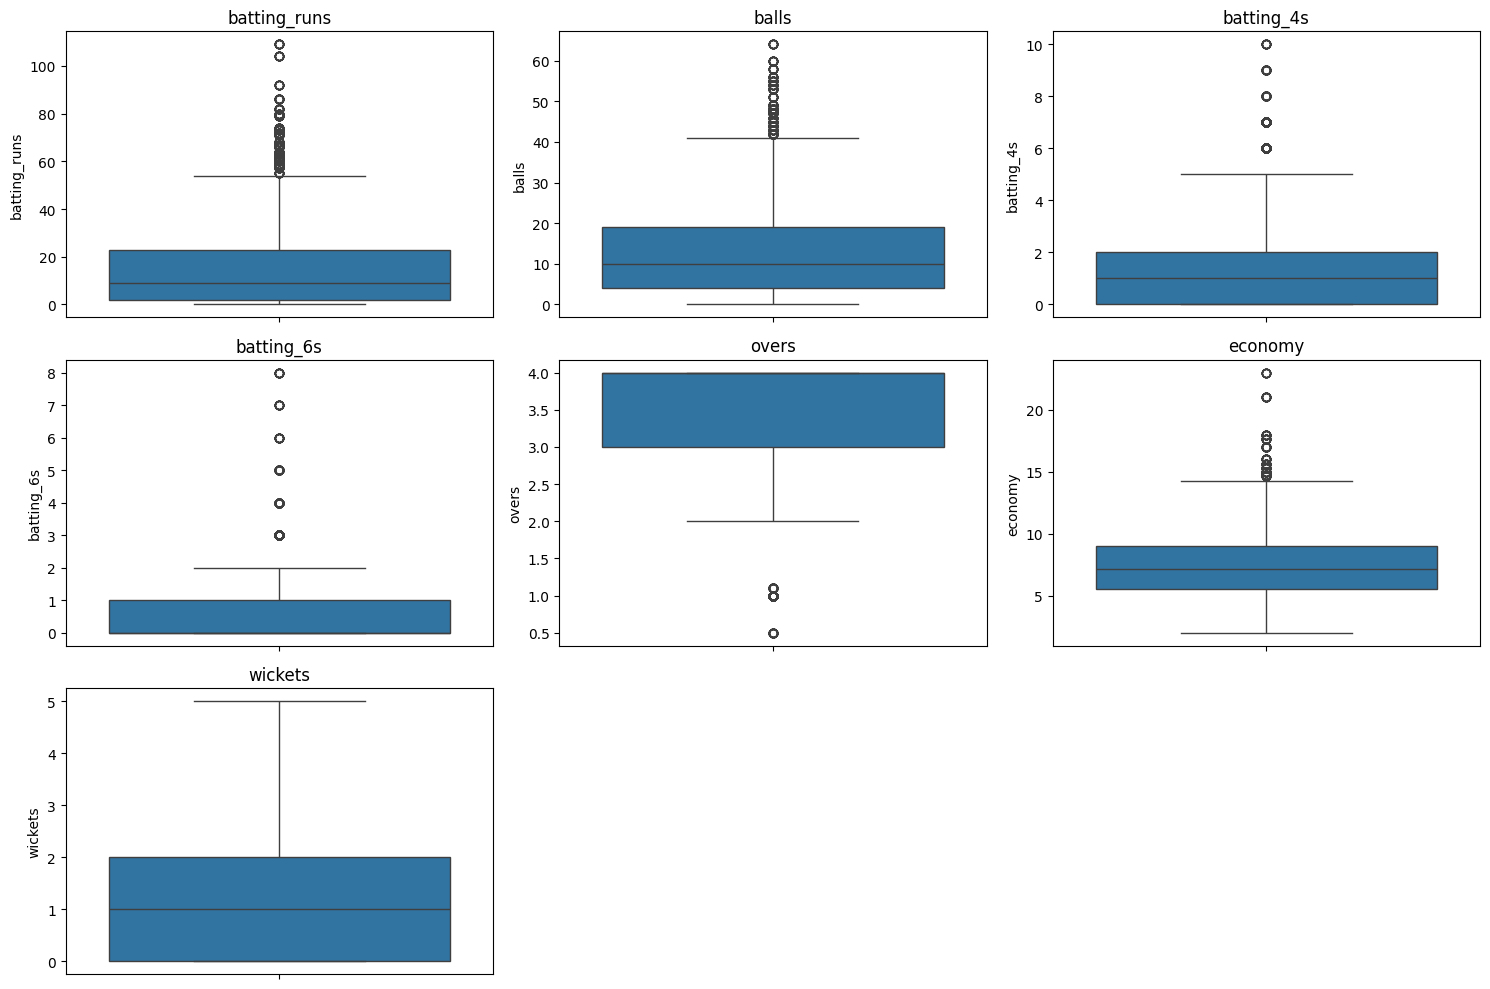

In [15]:
plt.figure(figsize=(15, 10))
for i, feature in enumerate(numerical_features, 1):
    plt.subplot(3, 3, i)
    sns.boxplot(data[feature])
    plt.title(feature)
plt.tight_layout()
plt.show()

In [16]:
categorical_features = ['batsmanName', 'bowlerName', 'teamInnings', 'bowlingTeam']
for feature in categorical_features:
    print(f"{feature} has {data[feature].nunique()} unique values")

batsmanName has 200 unique values
bowlerName has 132 unique values
teamInnings has 16 unique values
bowlingTeam has 16 unique values


In [17]:
def handle_outliers(df, features):
    for feature in features:
        lower_cap = df[feature].quantile(0.01)
        upper_cap = df[feature].quantile(0.99)
        df[feature] = np.clip(df[feature], lower_cap, upper_cap)
    return df

In [18]:
data = handle_outliers(data, numerical_features)

In [19]:
le = LabelEncoder()
data['teamInnings'] = le.fit_transform(data['teamInnings'])
data['bowlingTeam'] = le.fit_transform(data['bowlingTeam'])

In [20]:
X = data[['battingPos', 'balls', 'batting_4s', 'batting_6s', 'overs', 'wickets', 'economy', 'teamInnings', 'bowlingTeam']]
y = data['batting_runs']

In [21]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [22]:
preprocessor = ColumnTransformer(
    transformers=[
        ('num', MinMaxScaler(), ['battingPos', 'balls', 'batting_4s', 'batting_6s', 'overs', 'wickets', 'economy'])
    ]
)

In [23]:
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', SVR(kernel = 'rbf', C = 1.0, epsilon = 0.1))
])

In [24]:
pipeline.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num', MinMaxScaler(),
                                                  ['battingPos', 'balls',
                                                   'batting_4s', 'batting_6s',
                                                   'overs', 'wickets',
                                                   'economy'])])),
                ('regressor', SVR())])

In [25]:
y_pred = pipeline.predict(X_test)

In [26]:
rmse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"RMSE: {rmse}")
print(f"R² Score: {r2}")

RMSE: 10.455032090467023
R² Score: 0.9683102886265083
